# Exploring the Titanic Dataset

Exploratory analysis using the Titanic dataset.

Read more about the titanic dataset here: https://www.kaggle.com/c/titanic

In [6]:
import numpy as np
import pandas as pd

pd.set_option('precision', 3)

titanic_df = pd.read_csv("../datasets/titanic-dataset.csv")

In [2]:
import os
import pandas as pd
file_path = os.path.join("..", "datasets", "titanic-dataset.csv")
titanic_df = pd.read_csv(file_path)

# Data Exploration

Have a look at the dataset. These should be the variables in it:
    
    * survival: Survival (0 = No; 1 = Yes)
    * pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * name: Name
    * sex: Sex
    * age: Age
    * sibsp: Number of Siblings/Spouses Aboard
    * parch: Number of Parents/Children Aboard
    * ticket: Ticket Number
    * fare: Passenger Fare
    * cabin: Cabin
    * embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
        
**pclass**: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

### Excercise 1: Data cleanup

Identify quantitative, categorical and ordinal variables.

Identify if there are columns with missing values and decide how to deal with them.

You could either remove the column, or replace the missing values with a sensible **robust** estimate

In [3]:
titanic_df.sample(5)

PassengerId  Survived  Pclass                              Name     Sex  \
279          280         1       3  Abbott, Mrs. Stanton (Rosa Hunt)  female   
515          516         0       1      Walker, Mr. William Anderson    male   
512          513         1       1         McGough, Mr. James Robert    male   
593          594         0       3                Bourke, Miss. Mary  female   
745          746         0       1      Crosby, Capt. Edward Gifford    male   

      Age  SibSp  Parch     Ticket    Fare Cabin Embarked  
279  35.0      1      1  C.A. 2673  20.250   NaN        S  
515  47.0      0      0      36967  34.021   D46        S  
512  36.0      0      0   PC 17473  26.288   E25        S  
593   NaN      0      2     364848   7.750   NaN        Q  
745  70.0      1      1  WE/P 5735  71.000   B22        S

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exercise 2: How Survival is correlated to other attributes of the dataset ? Find out the correlation coefficient.

You can also draw plots showing the correlation coefficient between variable

In [7]:
titanic_num_df = titanic_df.select_dtypes(include=np.number)
titanic_num_df.head(5)


PassengerId  Survived  Pclass   Age  SibSp  Parch    Fare
0            1         0       3  22.0      1      0   7.250
1            2         1       1  38.0      1      0  71.283
2            3         1       3  26.0      0      0   7.925
3            4         1       1  35.0      1      0  53.100
4            5         0       3  35.0      0      0   8.050

In [10]:
titanic_num_df.corr()

PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
PassengerId        1.000    -0.005  -0.035  0.037 -0.058 -0.002  0.013
Survived          -0.005     1.000  -0.338 -0.077 -0.035  0.082  0.257
Pclass            -0.035    -0.338   1.000 -0.369  0.083  0.018 -0.549
Age                0.037    -0.077  -0.369  1.000 -0.308 -0.189  0.096
SibSp             -0.058    -0.035   0.083 -0.308  1.000  0.415  0.160
Parch             -0.002     0.082   0.018 -0.189  0.415  1.000  0.216
Fare               0.013     0.257  -0.549  0.096  0.160  0.216  1.000

In [11]:
titanic_num_df.corr()["Survived"]

PassengerId   -0.005
Survived       1.000
Pclass        -0.338
Age           -0.077
SibSp         -0.035
Parch          0.082
Fare           0.257
Name: Survived, dtype: float64

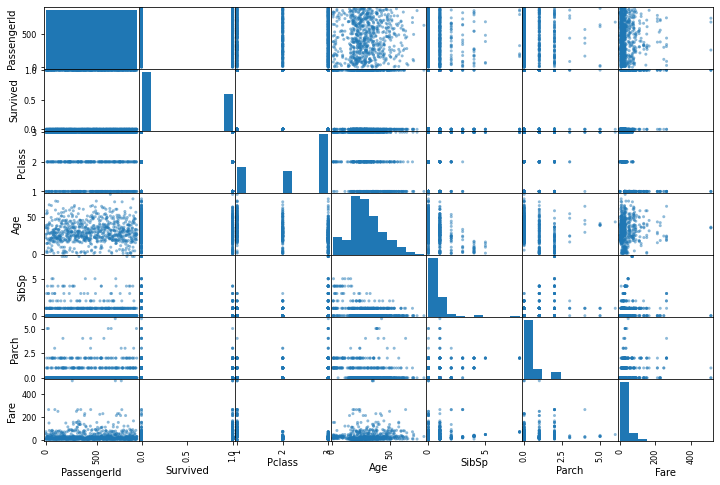

In [9]:
_ = pd.plotting.scatter_matrix(titanic_num_df, figsize=(12, 8))
# scatter matrix

## Exercise 3: Did Sex play a role in Survival?

Advanced: you could also make sure that there are no other factors (e.g. age) confounding the impact of sex in survival.

For instance if a greater share of women than men were very old and their survival rate were lower this may be due to age factors rather than to sex.

In [14]:
titanic_df[["Sex", "Survived"]].groupby("Sex").mean()

Survived
Sex             
female     0.742
male       0.189

In [29]:
titanic_df[["Sex", "Survived"]].groupby(["Sex", "Survived"]).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

Let's explore sex and survival in conjunction with age.

First we will fill the missing values.

In [30]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())

Then we will convert the numeric "Age" into an ordinal variable "AgeGroup"

In [31]:
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
titanic_df['AgeGroup'] = titanic_df.Age.apply(age_group)
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket    Fare Cabin Embarked  Alone AgeGroup  
0      0         A/5 21171   7.250   NaN        S  False    20-29  
1      0          PC 17599  71.283   C85        C  False    30-39  
2      0  STON/O2. 3101282   7.925   NaN        S   True    20-29  
3      0            113803  53.100  C123        S  False    30-39  
4      0            373450   8.050   NaN        S   True    30-39

In [35]:
titanic_df.groupby(['Sex','AgeGroup'], as_index=False)['Survived'].agg([np.mean, np.size])

mean  size
Sex    AgeGroup             
female 0-9       0.633    30
       10-19     0.756    45
       20-29     0.704   125
       30-39     0.833    60
       40-49     0.688    32
       50-59     0.889    18
       60-69     1.000     4
male   0-9       0.594    32
       10-19     0.123    57
       20-29     0.151   272
       30-39     0.215   107
       40-49     0.211    57
       50-59     0.133    30
       60-69     0.133    15
       70-79     0.000     6
       80-89     1.000     1

Survival rate of (adult) females across all age groups seems to be consistently higher than survival rate among (adult) men

## Exercise 4: Did class played role in survival ?

In [16]:
by_pclass = titanic_df[["Pclass", "Survived"]].groupby("Pclass")


In [17]:
by_pclass.mean()

Survived
Pclass          
1          0.630
2          0.473
3          0.242

In [28]:
titanic_df[["Pclass", "Survived"]].groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [20]:
titanic_df[["Pclass", "Survived", "Sex"]].groupby(["Pclass", "Sex"]).mean()

Survived
Pclass Sex             
1      female     0.968
       male       0.369
2      female     0.921
       male       0.157
3      female     0.500
       male       0.135

It seems evident that people embarked on first class had a better chance of survival compared to those in 2nd and 3rd class.

## Exercise 5: Did being alone onboard play a role in survival ?

Think of how you can extract the alone variable from the existing ones.

In [23]:
titanic_df["Alone"] = (titanic_df["Parch"] == 0) & (titanic_df["SibSp"] == 0)
titanic_df["Alone"]

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Alone, Length: 891, dtype: bool

In [24]:
titanic_df[["Alone", "Survived"]].groupby("Alone").mean()

Survived
Alone          
False     0.506
True      0.304

In [26]:
titanic_df[["Alone", "Survived"]].groupby(["Alone", "Survived"]).size()

Alone  Survived
False  0           175
       1           179
True   0           374
       1           163
dtype: int64

It seems that being alone was not good for your survival chances on the Titanic.